In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objects as go

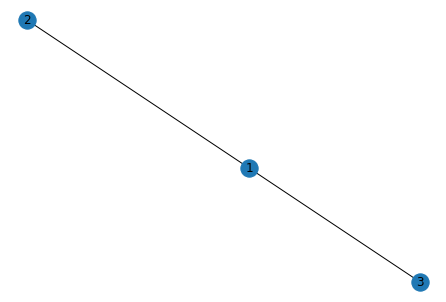

In [18]:
G = nx.Graph()
G.add_edge(1,2, weight=1)
G.add_edge(1,3, weight=2)
G.nodes[1]["name"] = "James"
G.nodes[1]["size"] = 1
G.nodes[2]["name"] = "Bob"
G.nodes[2]["size"] = 2
G.nodes[3]["name"] = "Alice"
G.nodes[3]["size"] = 3
nx.draw(G, with_labels=True)
plt.show()

In [19]:
# Collect node position
pos_ = nx.spring_layout(G)

In [20]:
pos_

{1: array([-0.08048449, -0.02525904]),
 2: array([1.        , 0.31383698]),
 3: array([-0.91951551, -0.28857794])}

In [44]:
def make_edge(x, y, text, width):
    return  go.Scatter(x         = x,
                    y         = y,
                    line      = dict(width = width,
                                color = 'cornflowerblue'),
                    hoverinfo = 'text',
                    text      = ([text]),
                    mode      = 'lines+text',
                    textposition= 'bottom center')

In [45]:
# For each edge, make an edge_trace, append to list
edge_trace = []
for edge in G.edges():
    char_1 = edge[0]
    char_2 = edge[1]
    x0, y0 = pos_[char_1]
    x1, y1 = pos_[char_2]
    print(edge)
    text   = str(char_1) + '--' + str(char_2) + ': ' + str(G.edges()[edge]['weight'])
    print(text)
    trace  = make_edge([x0, x1, None], [y0, y1, None], text, width = 0.3*G.edges()[edge]['weight']**1.75)
    edge_trace.append(trace)

(1, 2)
1--2: 1
(1, 3)
1--3: 2


In [46]:
# Make a node trace
node_trace = go.Scatter(x         = [],
                        y         = [],
                        text      = [],
                        textposition = "top center",
                        textfont_size = 10,
                        mode      = 'markers+text',
                        hoverinfo = 'none',
                        marker    = dict(color = [],
                                         size  = [],
                                         line  = None))
# For each node in midsummer, get the position and size and add to the node_trace
for node in G.nodes():
    x, y = pos_[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['marker']['color'] += tuple(['cornflowerblue'])
    node_trace['marker']['size'] += tuple([5*G.nodes()[node]['size']])
    node_trace['text'] += tuple(['<b>' + str(G.nodes()[node]['name']) + '</b>'])
    print(tuple(['<b>' + str(G.nodes()[node]['name']) + '</b>']))

('<b>James</b>',)
('<b>Bob</b>',)
('<b>Alice</b>',)


In [47]:
# Customize layout
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)', # transparent background
    plot_bgcolor='rgba(0,0,0,0)', # transparent 2nd background
    xaxis =  {'showgrid': False, 'zeroline': False}, # no gridlines
    yaxis = {'showgrid': False, 'zeroline': False}, # no gridlines
)
# Create figure
fig = go.Figure(layout = layout)
# Add all edge traces
for trace in edge_trace:
    fig.add_trace(trace)
# Add node trace
fig.add_trace(node_trace)
# Remove legend
fig.update_layout(showlegend = False)
# Remove tick labels
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)
# Show figure
fig.show()